# EDA

We started with the cleaned-up data and prepared it to examine a few subsets of countries. The subsets we chose were least developed countries (LDCs) and oil-producing countries, though some other groupings were considered. 

LDCs were of interest for a number of reasons. In part due to their geography--often equatorial and either landlocked or islands--and in part due to their poverty, these countries are likely to be disproportionately impacted by the effects of global warming, such as desertification in sub-Saharan Africa and rising sea levels that cause flooding in small island nations. It is also a common practice for wealthier nations to "export" their pollution, either through cap-and-trade deals or by outsourcing factories to less developed nations. Finally, the world has an opportunity to engineer a more sustainable path of development for LDCs than other parts of the world followed during their own development. 

Oil-producing countries are rich in the resource that produces both energy and energy emissions, therefore we wanted to see how their energy consumption and emissions differed from the rest of the world. In many respects, this is a very diverse group of countries, including large wealthy nations like the US and China, as well as small countries that are also on the LDC list, such as Congo-Brazzaville and Angola. Nonetheless, we were interested to see if their common resource united them in any measurable way. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the cleaned data
main_df = pd.read_csv('../data/cleaned_energy_data.csv')

In [3]:
main_df.head()

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,...,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids
0,World,1992,5.481774e+06,65.769659,64.426755,6.923158,51013.270526,353.718416,92.558725,76.984223,...,481679.269000,400.464479,30667.877,17854.85234,494096.4675,400.795117,22529.424264,8587.186368,4076.853622,9865.384274
1,Afghanistan,1992,1.448550e+04,51.641000,2.159523,1.042253,30.013600,0.016143,0.000158,0.011092,...,0.000000,0.131000,0.000,0.00000,0.0000,0.000000,1.704078,0.015551,0.588528,1.100000
2,Albania,1992,3.245890e+03,71.802000,25.937798,8.087302,10.410300,0.065519,0.003415,0.003760,...,104.719450,0.104000,0.000,0.00000,0.0000,0.560000,3.901890,0.502372,0.199519,3.200000
3,Algeria,1992,2.702830e+04,67.575000,48.164981,5.592648,232.773000,5.031036,0.000380,2.325281,...,1139.243484,0.125000,279.400,1240.61590,0.0000,1.061000,74.390488,2.687475,45.703013,26.000000
4,Angola,1992,1.265740e+04,45.230000,6.689229,1.423070,59.496900,1.152349,0.000000,0.021076,...,0.000000,0.000000,508.400,0.00000,0.0000,0.000000,5.218203,0.000000,1.118203,4.100000


## Worldwide EDA

For worldwide trends, I used Tableau. The Tableau workbook can be accessed here:
[Project 5 Worldwide EDA](https://public.tableau.com/app/profile/annelise.holverstott/viz/Project_5_worldwide_EDA/)

## Least Developed Countries (LDCs)

In this section, we specifically focused on a list of countries identified as ["Least Developed Countries"](https://www.un.org/development/desa/dpad/wp-content/uploads/sites/45/publication/ldc_list.pdf) (LDCs) by the UN. These countries rank low on the "Human Development Index," or HDI. For more information on HDI, check out these resources:
- [UN Human Development Reports](http://hdr.undp.org/en/content/download-data)
- [World Population Review](https://worldpopulationreview.com/country-rankings/least-developed-countries)

Some of the LDCs on the UN list had already been dropped from our data due to null values. For those that remained, I created a separate data frame with a couple of engineered features: 
1. `emissions_total` which is a sum of all the emissions features. This was useful because the emissions for each pollutant was very small, so adding them together magnified trends. 
2. `emissions_per_pop` was a corollary to one of our main features, `consupmtion per capita` that ended up not being as useful as I thought it would be. 

In [4]:
least_developed_countries = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso'
                             'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros',
                             'Congo-Brazzaville', 'Congo-Kinshasa', 'Djibouti', 'Ethiopia',
                             'Gambia, The', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos', 
                             'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
                             'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Rwanda', 'Sao Tome and Principe',
                             'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia', 
                             'Sudan', 'Togo', 'Uganda', 'Tanzania', 'Yemen', 'Zambia'
                            ]

In [5]:
ldc_df = pd.DataFrame(main_df[main_df.country.isin(least_developed_countries)])

In [6]:
# convert year to datetime
ldc_df['year'] = pd.to_datetime(main_df['year'], yearfirst=True, format='%Y')

In [7]:
ldc_df['emissions_total'] = ldc_df['emissions_co2_emissions'] + ldc_df['emissions_coal_and_coke'] + ldc_df['emissions_consumed_natural_gas']+ ldc_df['emissions_petroleum_and_other_liquids']
ldc_df['emissions_per_pop'] = ldc_df['emissions_total'] / ldc_df['population']

In [8]:
ldc_df.head()

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,...,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,emissions_total,emissions_per_pop
1,Afghanistan,1992-01-01,14485.500,51.641,2.159523,1.042253,30.0136,0.016143,0.000158,0.011092,...,0.000,0.0,0.0,0.000,1.704078,0.015551,0.588528,1.10000,3.408157,0.000235
4,Angola,1992-01-01,12657.400,45.230,6.689229,1.423070,59.4969,1.152349,0.000000,0.021076,...,508.400,0.0,0.0,0.000,5.218203,0.000000,1.118203,4.10000,10.436406,0.000825
13,Bangladesh,1992-01-01,107984.000,59.618,2.647463,1.624293,176.0050,0.204425,0.000000,0.194071,...,0.000,0.0,0.0,0.000,16.433322,0.336537,10.296785,5.80000,32.866644,0.000304
18,Benin,1992-01-01,5331.810,54.776,2.124834,0.994890,11.3874,0.012589,0.000000,0.000000,...,2.563,0.0,0.0,0.000,0.800000,0.000000,0.000000,0.80000,1.600000,0.000300
19,Bhutan,1992-01-01,532.332,54.384,24.728125,9.205295,1.4300,0.016641,0.000053,0.000000,...,0.000,0.0,0.0,1.445,0.122191,0.040931,0.000000,0.08126,0.244382,0.000459


In [9]:
# mean values for the entire group at the end of the time frame (1992)

ldc_df[ldc_df.year == '1992-01-01']

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,...,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,emissions_total,emissions_per_pop
1,Afghanistan,1992-01-01,14485.5000,51.641,2.159523,1.042253,30.013600,0.016143,0.000158,0.011092,...,0.000,0.0,0.00000,0.000,1.704078,0.015551,0.588528,1.10000,3.408157,0.000235
4,Angola,1992-01-01,12657.4000,45.230,6.689229,1.423070,59.496900,1.152349,0.000000,0.021076,...,508.400,0.0,0.00000,0.000,5.218203,0.000000,1.118203,4.10000,10.436406,0.000825
13,Bangladesh,1992-01-01,107984.0000,59.618,2.647463,1.624293,176.005000,0.204425,0.000000,0.194071,...,0.000,0.0,0.00000,0.000,16.433322,0.336537,10.296785,5.80000,32.866644,0.000304
18,Benin,1992-01-01,5331.8100,54.776,2.124834,0.994890,11.387400,0.012589,0.000000,0.000000,...,2.563,0.0,0.00000,0.000,0.800000,0.000000,0.000000,0.80000,1.600000,0.000300
19,Bhutan,1992-01-01,532.3320,54.384,24.728125,9.205295,1.430000,0.016641,0.000053,0.000000,...,0.000,0.0,0.00000,1.445,0.122191,0.040931,0.000000,0.08126,0.244382,0.000459
30,Cambodia,1992-01-01,9623.9000,54.228,0.772822,0.460331,16.157000,0.000693,0.000000,0.000000,...,0.000,0.0,0.00000,0.000,0.500000,0.000000,0.000000,0.50000,1.000000,0.000104
33,Central African Republic,1992-01-01,2959.2400,48.267,1.441834,1.260006,3.386280,0.000796,0.000000,0.000000,...,0.000,0.0,0.00000,0.000,0.300000,0.000000,0.000000,0.30000,0.600000,0.000203
34,Chad,1992-01-01,6356.7400,47.187,0.746873,0.687615,6.904560,0.000000,0.000000,0.000000,...,0.000,0.0,0.00000,0.000,0.300000,0.000000,0.000000,0.30000,0.600000,0.000094
38,Comoros,1992-01-01,436.4540,57.623,2.015374,0.742444,1.184760,0.000021,0.000000,0.000000,...,0.000,0.0,0.00000,0.000,0.067490,0.000000,0.000000,0.06749,0.134980,0.000309
39,Congo-Brazzaville,1992-01-01,2489.9500,53.867,6.767732,1.576407,10.689700,0.372448,0.000000,0.000000,...,158.612,0.0,0.00000,0.000,0.900000,0.000000,0.000000,0.90000,1.800000,0.000723


In [10]:
# mean values for the entire group at the end of the time frame (2018)

ldc_df[ldc_df.year == '2018-01-01']

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,...,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,emissions_total,emissions_per_pop
4525,Afghanistan,2018-01-01,37173.500,64.486,3.431825,1.670275,76.378400,0.063176,0.048392,0.005998,...,0.000,0.000000,0.000000,0.0000,8.274967,4.752619,0.318252,3.204096,16.549934,0.000445
4528,Angola,2018-01-01,30833.300,60.782,12.616891,1.994526,195.044000,3.792675,0.000000,0.227785,...,1367.399,187.333510,0.000000,0.0000,21.203161,0.000000,1.679088,19.524073,42.406321,0.001375
4537,Bangladesh,2018-01-01,161353.000,72.320,9.614602,2.102236,737.950000,1.140753,0.019270,1.084883,...,0.000,0.000000,0.000000,0.0000,90.781631,10.029381,59.526547,21.225703,181.563262,0.001125
4542,Benin,2018-01-01,11491.200,61.470,8.746353,2.825356,35.572900,0.000047,0.000000,0.000000,...,0.000,0.000000,0.000000,0.0000,6.947637,0.278780,0.037151,6.631707,13.895274,0.001209
4543,Bhutan,2018-01-01,754.121,71.460,78.463691,7.698528,7.686030,0.065490,0.002757,0.000000,...,0.000,0.000000,1.963214,4.5810,0.895528,0.325393,0.000000,0.570135,1.791057,0.002375
4554,Cambodia,2018-01-01,16245.900,69.570,12.347205,3.103541,64.633100,0.043425,0.000000,0.000000,...,0.000,0.000000,0.000000,0.0000,11.890896,4.096288,0.000000,7.794608,23.781792,0.001464
4557,Central African Republic,2018-01-01,4673.940,52.805,1.545554,1.797701,4.018370,0.001366,0.000000,0.000000,...,0.000,0.000000,0.000000,0.0000,0.417437,0.000000,0.000000,0.417437,0.834874,0.000179
4558,Chad,2018-01-01,15486.500,53.977,0.910061,0.581815,24.223600,0.299621,0.000000,0.000000,...,116.000,0.000000,0.000000,0.0000,0.997570,0.000000,0.000000,0.997570,1.995140,0.000129
4562,Comoros,2018-01-01,832.458,64.118,3.880660,1.381985,2.337570,0.000004,0.000000,0.000000,...,0.000,0.000000,0.000000,0.0000,0.231874,0.000000,0.000000,0.231874,0.463747,0.000557
4563,Congo-Brazzaville,2018-01-01,5246.500,64.290,16.667468,4.831183,18.100300,0.792016,0.000000,0.051395,...,331.691,0.000000,0.000000,0.0260,4.433978,0.000000,2.726848,1.707130,8.867956,0.001690


After looking at some of the columns, I wanted to examine the relationships between a few features a little more closely. I chose the following columns and made pairplots for them:
- population
- life expectancy
- energy intensity (`ppp_2015USD`)
- total energy production
- total energy consumption
- coal imports
- coal exports
- total emissions

Even though these plots do not take into account the time-series aspect of the data, because each feature shows gradual change from one year to the next for each country, it is often possible to see the general trend of the relationship between the two variables across time as well. A good example is the relationship between population and energy intensity, where "dotted" lines for several countries are easily distinguished. 

Below the pairplots, see the target (`life_expectancy`) and another key variable (`total_emissions`) over time, per country. Bangladesh is omitted from the emissions plot because its trendline dominated all the other countries, so some specific tables for Bangladesh alone follow. 

In general, the plots show that life expectancy, emissions, and energy consumption are all increasing for LDCs. 

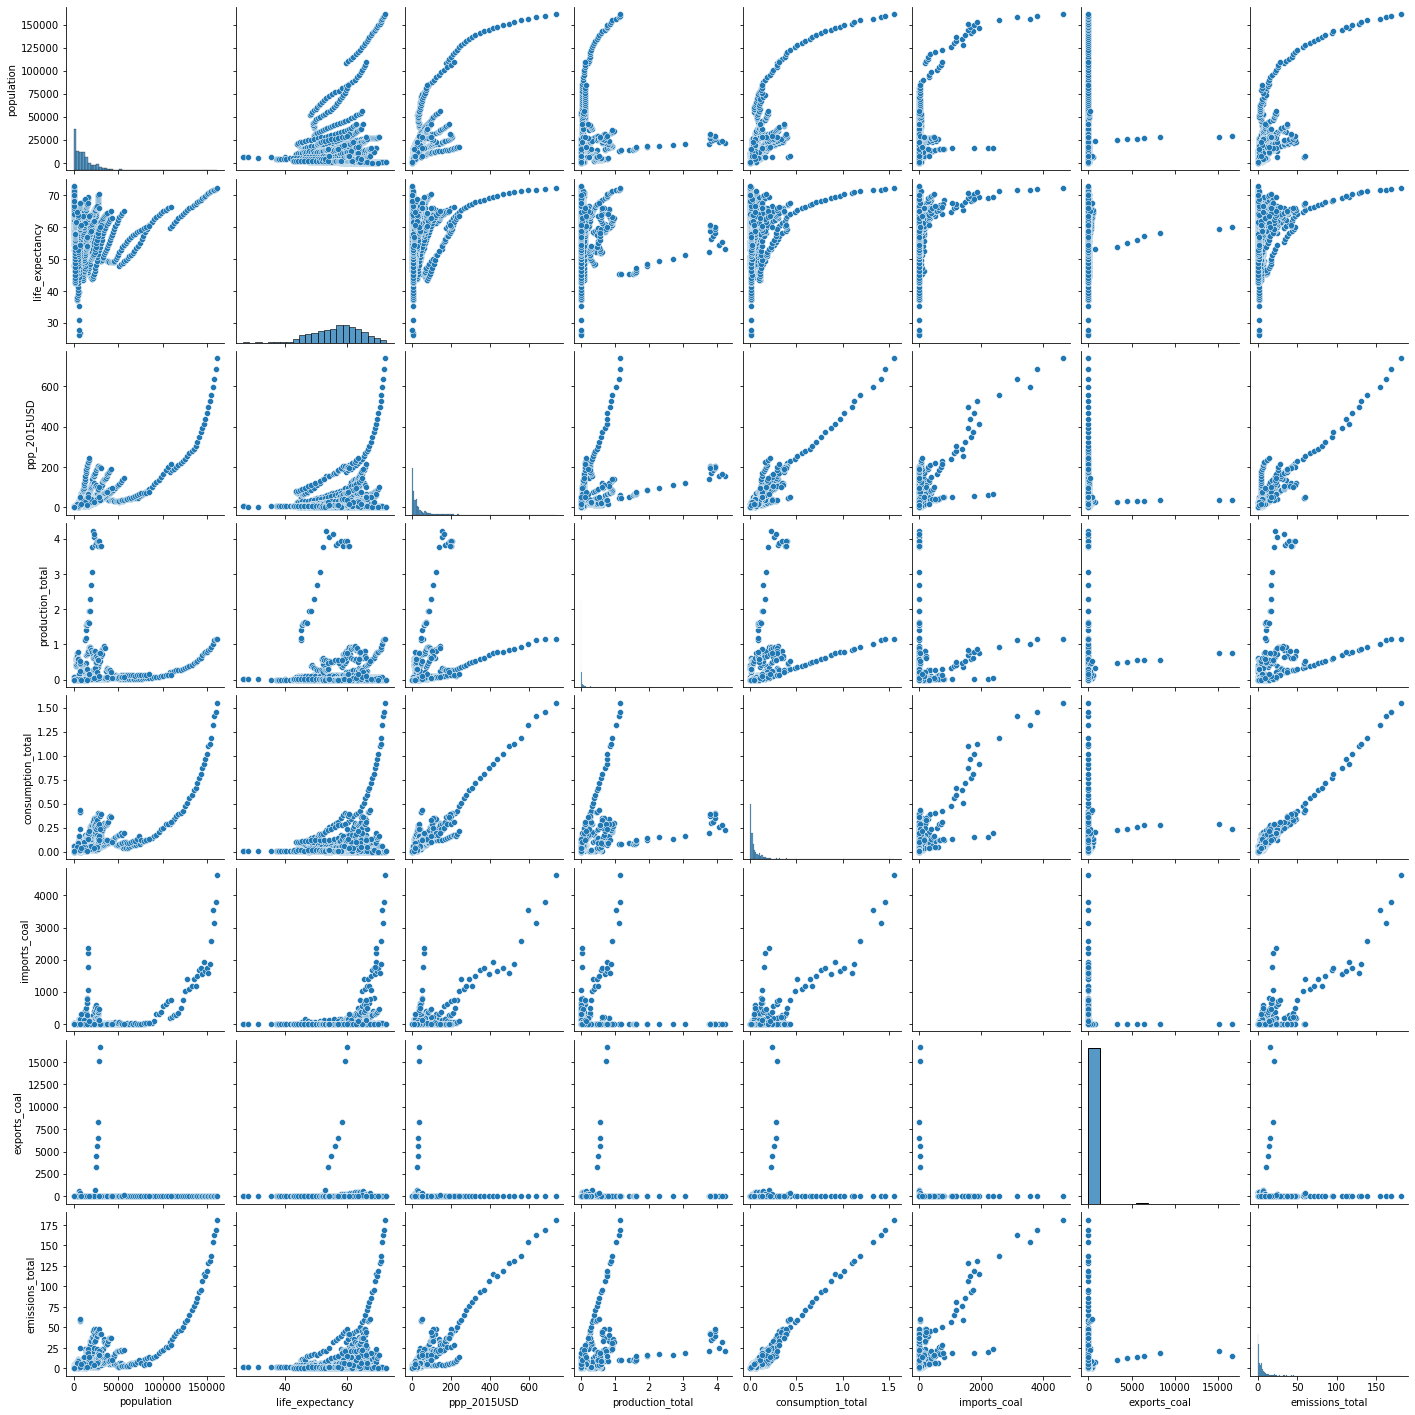

In [11]:
col_ind = [2,3,6,7,14,23,27,33]
features = ldc_df.columns[col_ind]
sns.pairplot(ldc_df, vars = features)

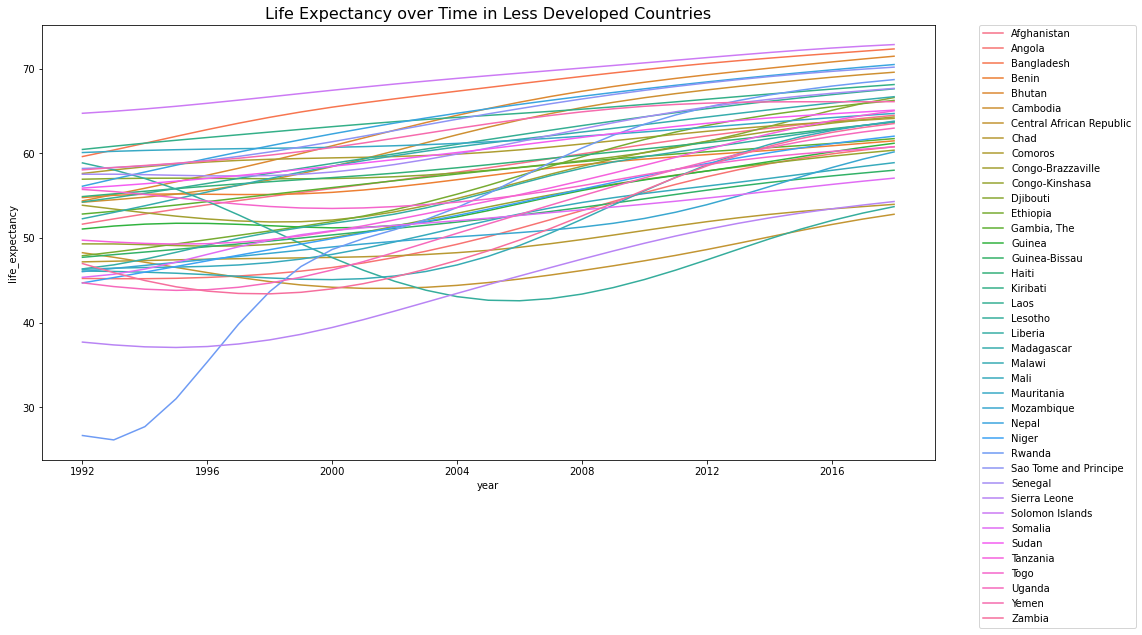

In [12]:
# Life expectancy over time, per country

plt.figure(figsize = (16, 8))
sns.lineplot(data = ldc_df, x = 'year', y = 'life_expectancy', hue = 'country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Life Expectancy over Time in Less Developed Countries', size = 16);
# put legend outside of the plot
# https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

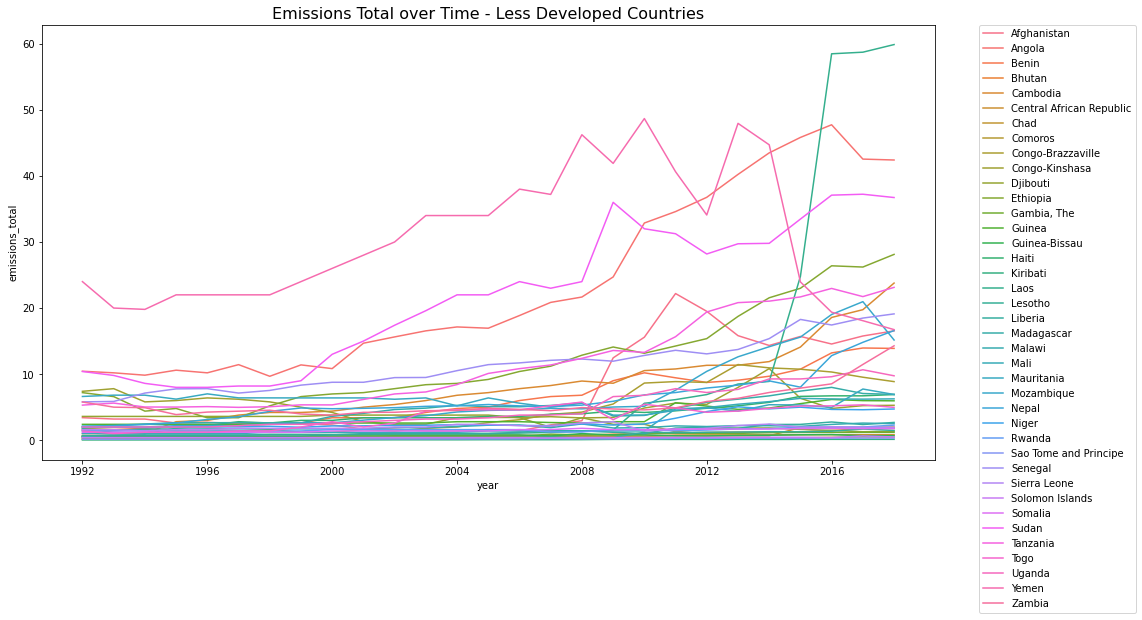

In [13]:
#Total emissions over time, per country (except Bangladesh)

plt.figure(figsize = (16, 8))
sns.lineplot(data = ldc_df[ldc_df['country'] != 'Bangladesh'], x = 'year', y = 'emissions_total', hue = 'country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Emissions Total over Time - Less Developed Countries', size = 16);

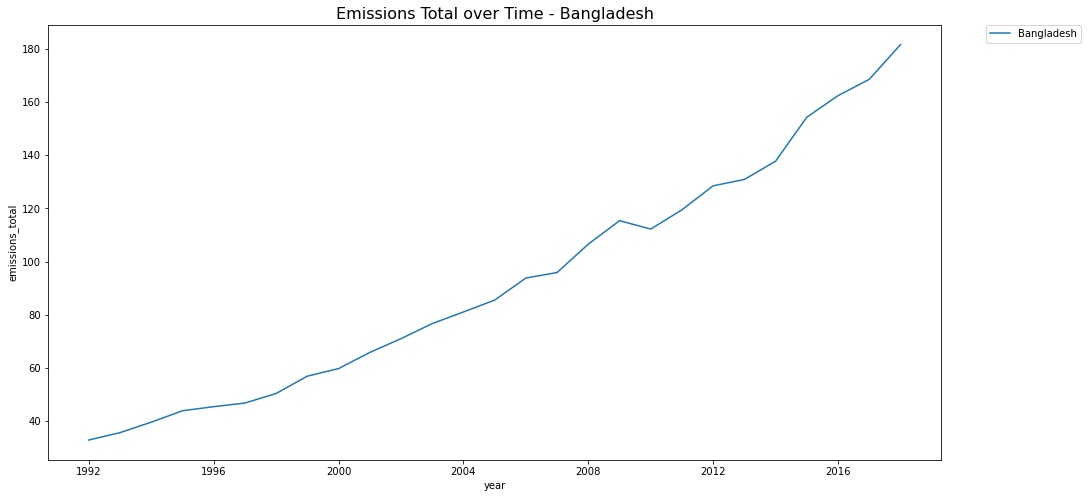

In [14]:
# Bangladesh

plt.figure(figsize = (16, 8))
sns.lineplot(data = ldc_df[ldc_df['country'] == 'Bangladesh'], x = 'year', y = 'emissions_total', hue = 'country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Emissions Total over Time - Bangladesh', size = 16);

In [15]:
ldc_df.groupby(['country', 'year']).mean().loc[('Bangladesh',),:]

,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,...,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,emissions_total,emissions_per_pop
year,,,,,,,,,,,,,,,,,,,,,
1992-01-01,107984.0,59.618,2.647463,1.624293,176.005,0.204425,0.000000,0.194071,0.002204,NaN,...,0.0,0.0,0.0,0.0,16.433322,0.336537,10.296785,5.800000,32.866644,0.000304
1993-01-01,110351.0,60.388,2.803053,1.680656,184.047,0.222012,0.000000,0.213397,0.002410,NaN,...,0.0,0.0,0.0,0.0,17.827565,0.405456,11.322109,6.100000,35.655130,0.000323
1994-01-01,112738.0,61.190,3.037431,1.787467,191.575,0.244167,0.000000,0.232257,0.003256,NaN,...,0.0,0.0,0.0,0.0,19.798064,0.475294,12.322769,7.000000,39.596128,0.000351
1995-01-01,115170.0,62.002,3.252350,1.863492,201.006,0.263654,0.000000,0.254804,0.002621,NaN,...,0.0,0.0,0.0,0.0,21.936818,0.517749,13.519068,7.900000,43.873635,0.000381
1996-01-01,117650.0,62.798,3.306515,1.849784,210.301,0.272208,0.000000,0.261375,0.003264,NaN,...,0.0,0.0,0.0,0.0,22.708188,0.612108,13.996080,8.100000,45.416376,0.000386
1997-01-01,120161.0,63.553,3.323037,1.817120,219.743,0.274745,0.000000,0.263795,0.003678,NaN,...,0.0,0.0,0.0,0.0,23.389948,0.893869,13.996080,8.500000,46.779896,0.000389
1998-01-01,122683.0,64.250,3.483921,1.849341,231.119,0.295698,0.000000,0.283502,0.003467,NaN,...,0.0,0.0,0.0,0.0,25.187678,1.346020,15.041658,8.800000,50.375356,0.000411
1999-01-01,125190.0,64.881,3.838731,1.986544,241.913,0.324582,0.000000,0.312889,0.003256,NaN,...,0.0,0.0,0.0,0.0,28.447993,1.847139,16.600855,10.000000,56.895987,0.000454
2000-01-01,127658.0,65.447,3.999034,2.004211,254.718,0.350522,0.000000,0.335362,0.005596,NaN,...,0.0,0.0,0.0,0.0,29.864598,2.071417,17.793181,10.000000,59.729196,0.000468


### Feature Trends Over Time

We divided our data into several groupings, which we then plotted against each other on a specific feature over time. For each subset of countries, the values for a given year are averaged. 

In [16]:
# making dummy columns for subset countries
landlocked = ['Afghanistan', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bhutan',
              'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad',
              'Czech Republic','Eswatini', 'Ethiopia', 'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
              'Lesotho', 'Liechtenstein','Luxembourg', 'Malawi', 'Mali', 'Moldova', 'Mongolia',
              'Nepal', 'Niger', 'North Macedonia', 'Paraguay','Rwanda', 'San Marino', 'Serbia',
              'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan','Turkmenistan', 'Uganda',
              'Uzbekistan', 'Vatican City', 'Zambia', 'Zimbabwe']

nuclear = ['Argentina', 'Armenia', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'China',
           'Czech Republic', 'Finland', 'France', 'Germany', 'Hungary', 'India', 'Iran', 'Japan',
           'Kazakhstan', 'Lithuania', 'Mexico', 'Netherlands', 'Pakistan', 'Romania', 'Russia',
           'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
           'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']

least_developed = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso',
                   'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros',
                   'Congo-Brazzaville', 'Congo-Kinshasa', 'Djibouti', 'Ethiopia', 'Gambia, The',
                   'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos',  'Lesotho', 'Liberia',
                   'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal',
                   'Niger', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
                   'Solomon Islands', 'Somalia', 'Sudan', 'Togo', 'Uganda', 'Tanzania', 'Yemen',
                   'Zambia']

oil_exporters = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran',
                 'Iraq', 'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates',
                 'Venezuela', 'United States', 'Russia', 'China']

opec = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran', 'Iraq',
        'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates','Venezuela']

main_df['is_landlocked'] = main_df['country'].map(lambda x: 1 if x in landlocked else 0)
main_df['is_nuclear'] = main_df['country'].map(lambda x: 1 if x in nuclear else 0)
main_df['is_least_developed'] = main_df['country'].map(lambda x: 1 if x in least_developed else 0)
main_df['is_oil_exporter'] = main_df['country'].map(lambda x: 1 if x in oil_exporters else 0)
main_df['is_opec'] = main_df['country'].map(lambda x: 1 if x in opec else 0)

world_index = main_df[main_df['country']=='World'].index
main_df = main_df.drop(index=world_index).copy()

# This is the Clarence Alvarez (TM) method for plotting two variables against each other
def comparison_plots(dummy_var, column):
    if not dummy_var.startswith('is_'):
        pass
    if (column.startswith('is_')) | (column == 'year') | (column == 'country'):
        pass
    
    ylabels_dict = {'population':'Thousands','life_expectancy':'Years','ppp_2015USD':'Billions in 2015USD',
                'consumption_per_capita':'Million British Thermal Units Per Capita',
                'consumption_per_GDP':'Thousand British Thermal Units Per 2015$ GDP PPP',
                'production_total':'Quadrillion British Thermal Units',
                'production_coal':'Quadrillion British Thermal Units',
                'production_natural_gas':'Quadrillion British Thermal Units',
                'production_petrolium_and_other_liquids':'Quadrillion British Thermal Units',
                'production_nuclear':'Quadrillion British Thermal Units',
                'production_nuclear_renewables_and_other':'Quadrillion British Thermal Units',
                'production_renewables_and_other':'Quadrillion British Thermal Units',
                'consumption_total':'Quadrillion British Thermal Units',
                'consumption_coal':'Quadrillion British Thermal Units',
                'consumption_natural_gas':'Quadrillion British Thermal Units',
                'consumption_petrolium_and_other_liquids':'Quadrillion British Thermal Units',
                'consumption_nuclear':'Quadrillion British Thermal Units',
                'consumption_nuclear_renewables_and_other':'Quadrillion British Thermal Units',
                'consumption_renewables_and_other':'Quadrillion British Thermal Units',
                'imports_crude_oil':'Thousand Barrels Per Day',
                'imports_natural_gas':'Billion Cubic Feet',
                'imports_coal':'Million Short Tons',
                'imports_electricity':'Billion kilowatt-hour',
                'exports_crude_oil':'Thousand Barrels Per Day',
                'exports_natural_gas':'Billion Cubic Feet',
                'exports_coal':'Million Short Tons',
                'exports_electricity':'Billion Kilowatt-Hour',
                'emissions_co2_emissions':'Million Tons CO2',
                'emissions_coal_and_coke':'Million Tons CO2',
                'emissions_consumed_natural_gas':'Million Tons CO2',
                'emissions_petroleum_and_other_liquids':'Million Tons CO2'}
    
    is_group = main_df.groupby([str(dummy_var),'year']).mean().loc[1,column]
    is_not_group = main_df.groupby([str(dummy_var),'year']).mean().loc[0,column]
    
    is_group.plot(figsize=(9,6), grid=True, label=dummy_var+'_1')
    is_not_group.plot(figsize=(9,6), grid=True, label=dummy_var+'_0')
    plt.title(label=column.replace('_',' ').title(), fontdict={'size':24})
    plt.xlabel(xlabel='Year', fontdict={'size':18})
    plt.xticks(list(range(1992,2020,2)))
    plt.ylabel(ylabel= ylabels_dict[column], fontdict={'size':18})
    plt.legend()

First, here are the emissions trends over time for LDCs. For all emissions, LDCs are slightly trending upwards, but developed countries dominate. 

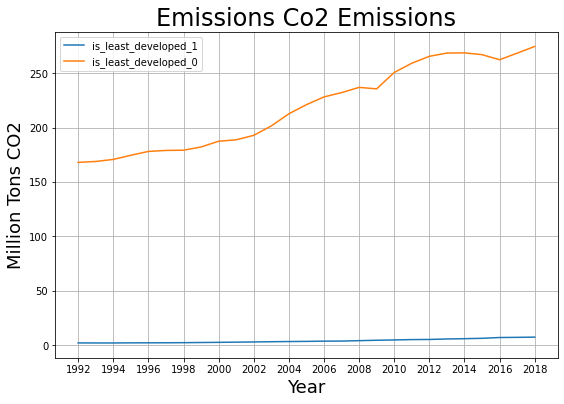

In [17]:
comparison_plots('is_least_developed','emissions_co2_emissions')

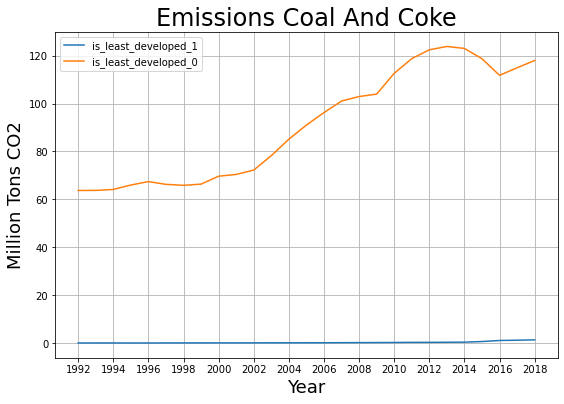

In [18]:
comparison_plots('is_least_developed','emissions_coal_and_coke')

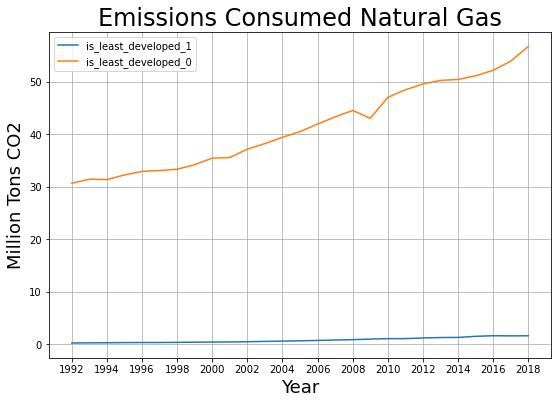

In [19]:
comparison_plots('is_least_developed','emissions_consumed_natural_gas')

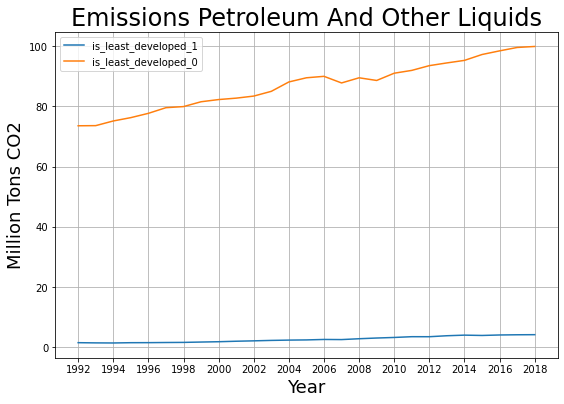

In [20]:
comparison_plots('is_least_developed','emissions_petroleum_and_other_liquids')

Energy intensity is the energy required to increase the GDP by \\$1 USD (2015). In the charts below, it is also referred to as "Consumption per GDP."

For both energy consumption and energy intensity, again we see that LDCs are increasing. However, the rest of the world is decreasing energy intensity, which suggests that more developed economies are becoming more efficient, but LDCs may be developing inefficiently. 

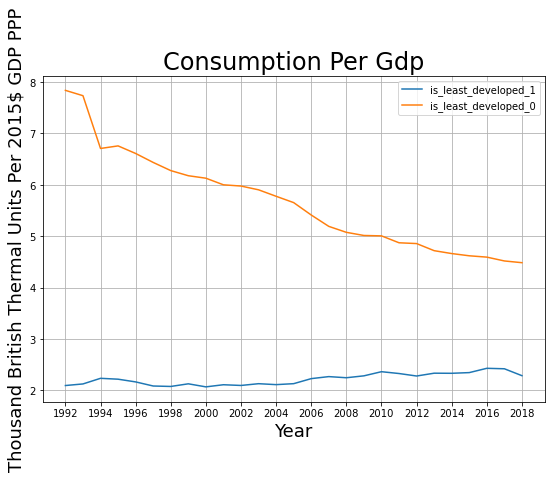

In [21]:
comparison_plots('is_least_developed','consumption_per_GDP')

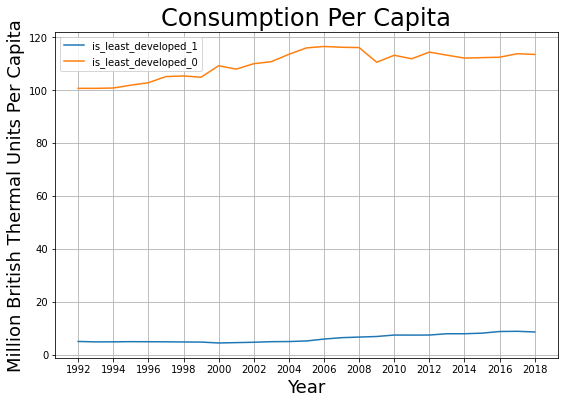

In [22]:
comparison_plots('is_least_developed','consumption_per_capita')

Finally, life expectancy is increasing worldwide, but at a faster rate in LDCs. 

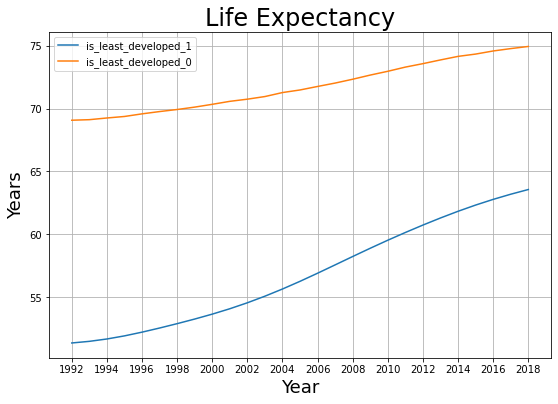

In [23]:
comparison_plots('is_least_developed','life_expectancy')

## Oil Producing Countries

This group consists of the [official members of OPEC](https://www.opec.org/opec_web/en/about_us/25.htm) as well as the United States, China, and Russia. 

### Feature Trends Over Time

Here are the same charts as above, for oil-producers. 

For emissions, the values are dwarf the rest of the world in all pollutant categories. This may be due to outsize influence of the US and China, the two biggest producers of emissions. However, notice that even though these countries are rich in oil, coal and coke emissions are also on the rise in this group. This may be in part because some oil-producing countries export all their oil. Lacking their own refineries, they are forced to either import back the refined oil from another country or buy another, cheaper energy product altogether. 

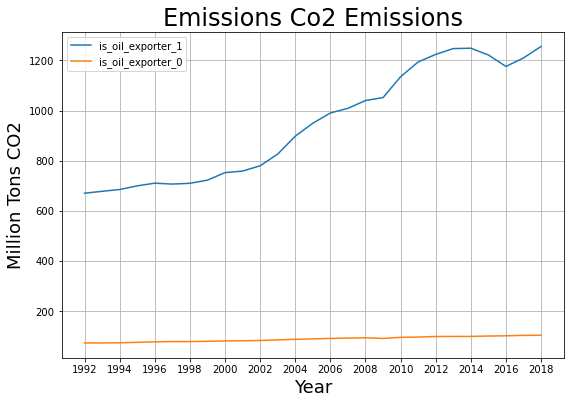

In [24]:
comparison_plots('is_oil_exporter','emissions_co2_emissions')
plt.savefig ('co2_emissions_oil_exporters')

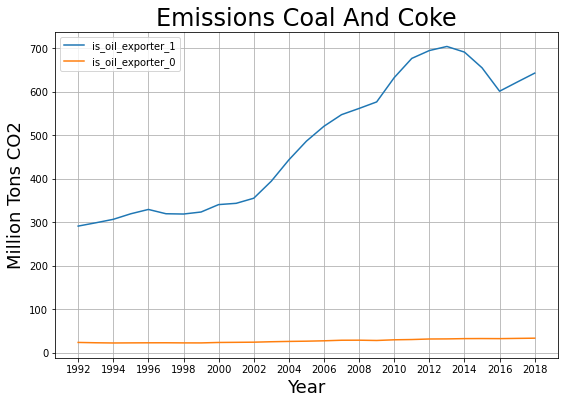

In [25]:
comparison_plots('is_oil_exporter','emissions_coal_and_coke')
plt.savefig ('coal_emissions_oil_exporters')

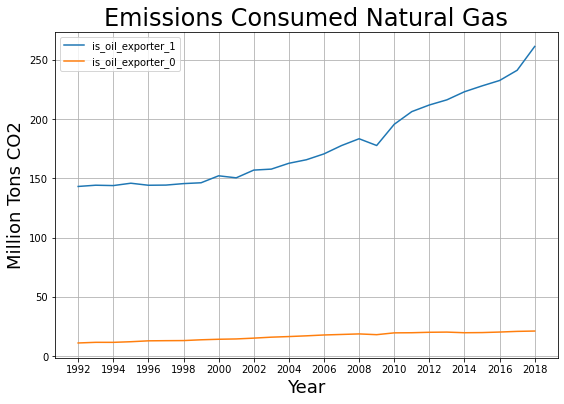

In [26]:
comparison_plots('is_oil_exporter','emissions_consumed_natural_gas')
plt.savefig ('natural_gas_emissions_oil_exporters')

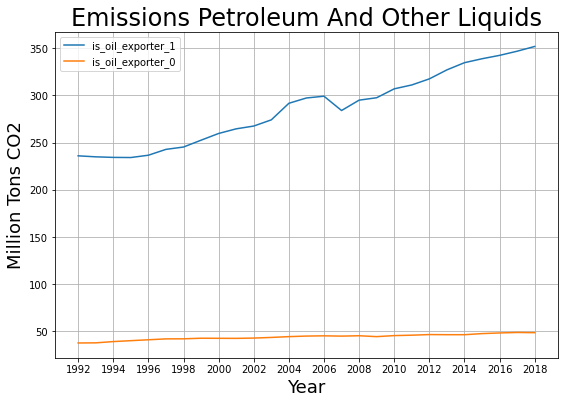

In [27]:
comparison_plots('is_oil_exporter','emissions_petroleum_and_other_liquids')
plt.savefig ('petroleum_emissions_oil_exporters')

Not surprisingly, because the oil-producing group includes some large economies and huge energy users, measures of both energy consumption and energy intensity also dwarf the rest of the world.

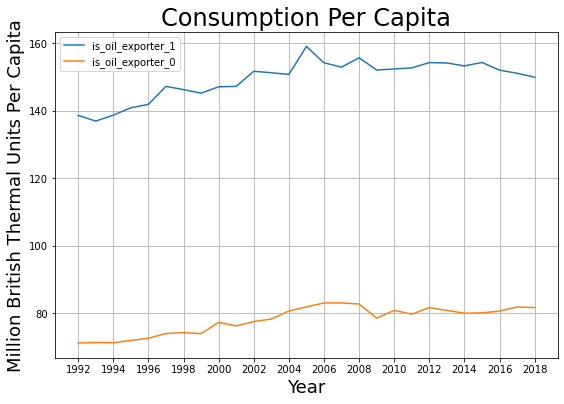

In [28]:
comparison_plots('is_oil_exporter','consumption_per_capita')
plt.savefig ('comsumption_per_capita_oil_exporters')

In this energy intensity plot, we can see the effects of various world-wide economic events on the consumption for oil-producers, such as the recession starting in 2007 and the oil boom in 2014 and subsequent softening of the global oil market. These countries are following a different path than the rest of the world, which is steadily declining in its energy intensity year after year. 

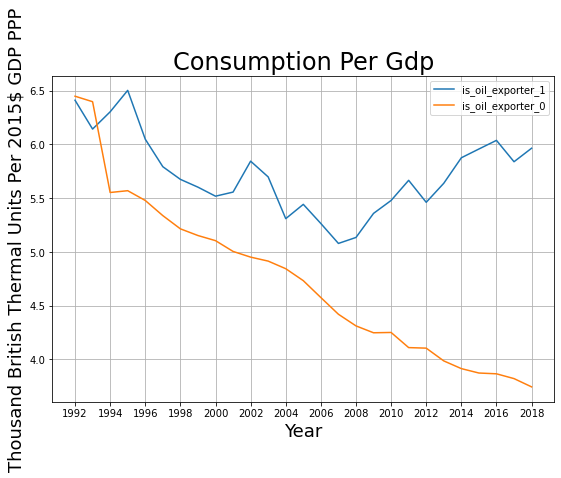

In [29]:
comparison_plots('is_oil_exporter','consumption_per_GDP')
plt.savefig ('comsumption_per_GDP_oil_exporters')

Life expectancy very closely mirrors the overall trend line, though lags slightly behind. 

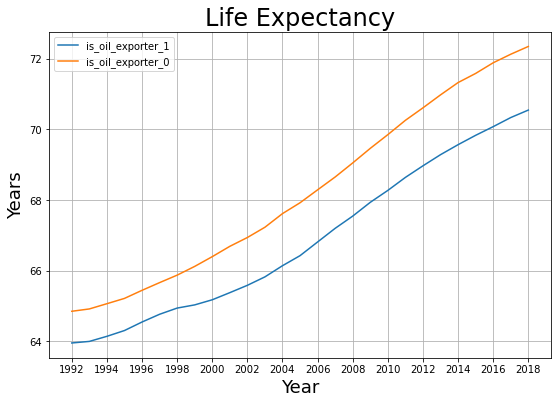

In [31]:
comparison_plots('is_oil_exporter','life_expectancy')
plt.savefig('life_expectancy_oil_exporters')